In [3]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Preprocessing

In [27]:
# load data 
df <- read.csv('dataset_diabetes/diabetic_data.csv')
map <- read.csv('dataset_diabetes/IDs_mapping.csv')
df[df == '?'] = NA
df[df == 'None'] = NA

# remove columns with NAs
#df <- df[,colSums(is.na(df)) == 0]

# relabel readmitted
df$readmitted = ifelse(df$readmitted=='NO',0,1)

# turn treatment into binomial
df[22:47] <- ifelse(df[22:47] == 'No', 0, 1)

In [28]:
# process insulin dataframe
df.insulin <- df[c('insulin','age')] #subset dataframe
df.insulin$insulin <- ifelse(df.insulin$insulin == 0, 'No', 'Yes') #relabel
df.insulin$insulin <- as.factor(df.insulin$insulin) 

# edit age labels
df.insulin$age <- gsub("[^0-9-]","",df.insulin$age) # remove [ )
df.insulin$age <- gsub("-","_",df.insulin$age)
df.insulin$age <- paste("age" , df.insulin$age, sep='_')

# EDA

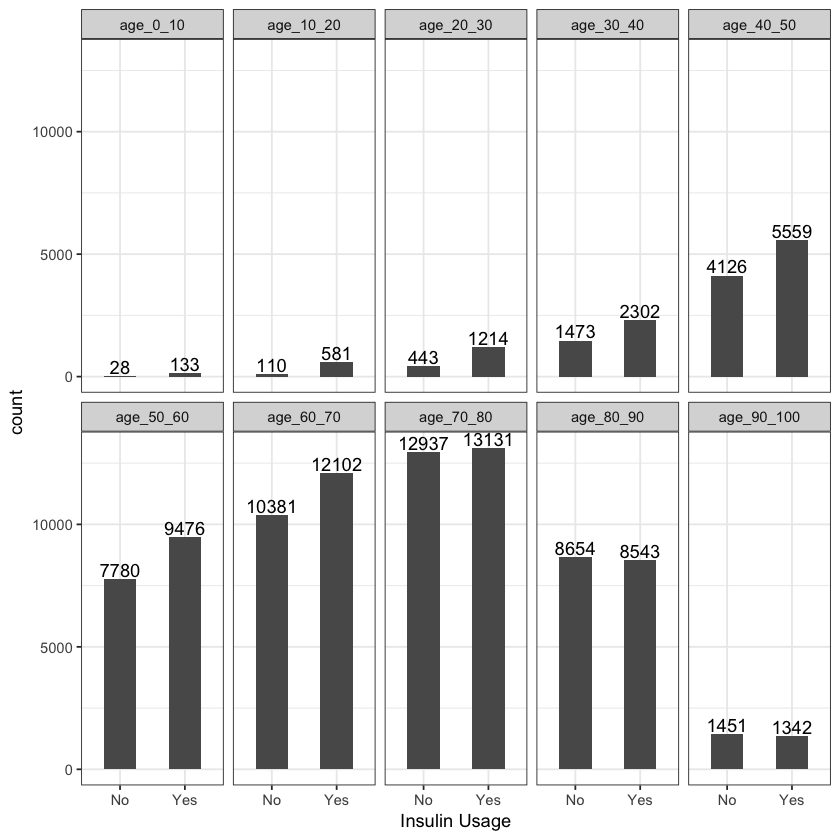

In [4]:
#plot histogram
ggplot(df.insulin, aes(x=insulin))+
    stat_count(width = 0.5)+
    facet_wrap(~age,nrow = 2)+
    xlab('Insulin Usage')+
    geom_text(stat='count', aes(label=..count..), vjust=-0.2)+
    theme_bw()

Here we see a disproportionate distribution of samples between insulin users faceted by age group.

# Beta-Binomial

In [112]:
#split dataset by age group
df.insulin.split <- split(df.insulin, df.insulin$age)

In [113]:
table(df.insulin.split$age_0_10)

       age
insulin age_0_10
    No        28
    Yes      133

In [114]:
# summarize splits
data <- matrix(nrow=length(unique(df.insulin$age)), ncol=3)
colnames(data) <- c('y','f','N')
for (i in 1: length(df.insulin.split)){
    #df.insulin.split[[i]] <- table(df.insulin.split[[i]])
    data[i,1] <- table(df.insulin.split[[i]])[2] #yes (success)
    data[i,2] <- table(df.insulin.split[[i]])[1] #no (failure)
    data[i,3] <- data[i,1] + data[i,2]
}

In [135]:
log.prior <- function(alpha,beta) {
  {-2.5}*log(alpha + beta)
}
draw.thetas <- function(alpha,beta) {
    #print(rbeta(J,alpha+y,beta+n-y))
    #cat('alpha',alpha+y,'\n')
    #cat('beta',beta+n-y)
    return(rbeta(J,alpha+y,beta+n-y))
}

draw.alpha <- function(alpha,beta,theta,prop.sd) {
    #alpha.star <- rnorm(1,alpha,prop.sd)
    alpha.star <- rgamma(1,alpha,2)
    #print(alpha)
  num <- J*(lgamma(alpha.star+beta) - lgamma(alpha.star)) +
    alpha.star*sum(log(theta)) + log.prior(alpha.star,beta)
  den <- J*(lgamma(alpha+beta)      - lgamma(alpha)) +
    alpha     *sum(log(theta)) + log.prior(alpha,beta)
# print(c(alpha,alpha.star,num,den))
  acc <- ifelse((log(runif(1))<=num - den)&&(alpha.star>0),1,0)
  alpha.acc <<- alpha.acc + acc
  return(ifelse(acc,alpha.star,alpha))
}

draw.beta <- function(alpha,beta,theta,prop.sd) {
    #beta.star <- rnorm(1,beta,prop.sd)
    beta.star <-rgamma(1,beta,2)
  num <- J*(lgamma(alpha+beta.star) - lgamma(beta.star)) +
    beta.star*sum(log(1-theta)) + log.prior(alpha,beta.star)
  den <- J*(lgamma(alpha+beta)      - lgamma(beta)) +
    beta     *sum(log(1-theta)) + log.prior(alpha,beta)
# print(c(beta,beta.star,num,den))
  acc <- ifelse((log(runif(1))<=num - den)&&(beta.star>0),1,0)
  beta.acc <<- beta.acc + acc

  return(ifelse(acc,beta.star,beta))
}

In [136]:
B <- 1000
M <- 10000
y <- data[,1]
n <- data[,3]
J <- length(y)
MM <- B + M

In [137]:
alpha <- matrix(NA,MM)
beta <- matrix(NA,MM)
theta <- matrix(NA,nrow=MM,ncol=J)

Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs pr

“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + beta):
“NaNs produced”Warning message in log(alpha + 

alpha.rate  beta.rate 
      0.83       0.25 


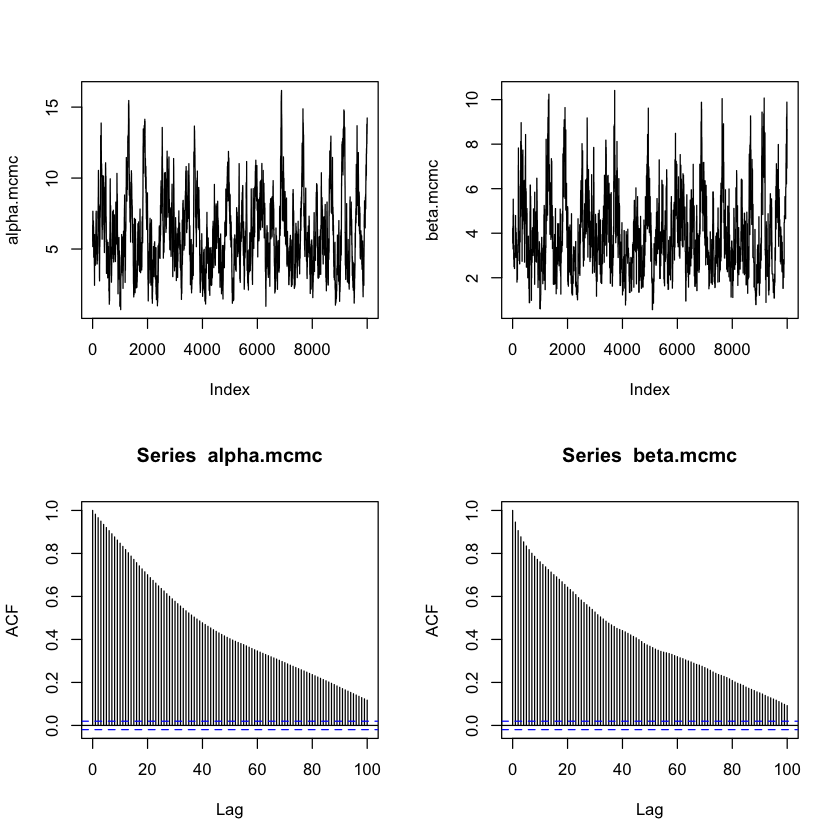

In [138]:
# Metropolis tuning parameters
alpha.prop.sd <-  0.6
beta.prop.sd <-   3.2

# Initial values for the chain
alpha[1] <- 1
beta[1] <- 1
theta[1,] <- draw.thetas(alpha[1],beta[1]) # or theta[1,] <- (y+.5/(n+.5)

# Monitor acceptance frequency
alpha.acc <- 0
beta.acc <- 0

# MCMC simulation
for (m in 2:MM) {
  alpha[m] <- draw.alpha(alpha[m-1],beta[m-1],theta[m-1,],alpha.prop.sd)
  beta[m] <- draw.beta(alpha[m],beta[m-1],theta[m-1,],beta.prop.sd)
  theta[m,] <- draw.thetas(alpha[m],beta[m])
}

good <- (B+1):MM

alpha.mcmc <- alpha[good]
beta.mcmc <- beta[good]
theta.mcmc <- theta[good,]


par(mfrow=c(2,2))
plot(alpha.mcmc,type="l")
plot(beta.mcmc,type="l")
acf(alpha.mcmc,100)
acf(beta.mcmc,100)

print(round(c(alpha.rate=alpha.acc/MM,beta.rate=beta.acc/MM),2))

Warning message in persp.default(kde2d(alpha/beta, log(alpha + beta)), theta = 45, :
“surface extends beyond the box”

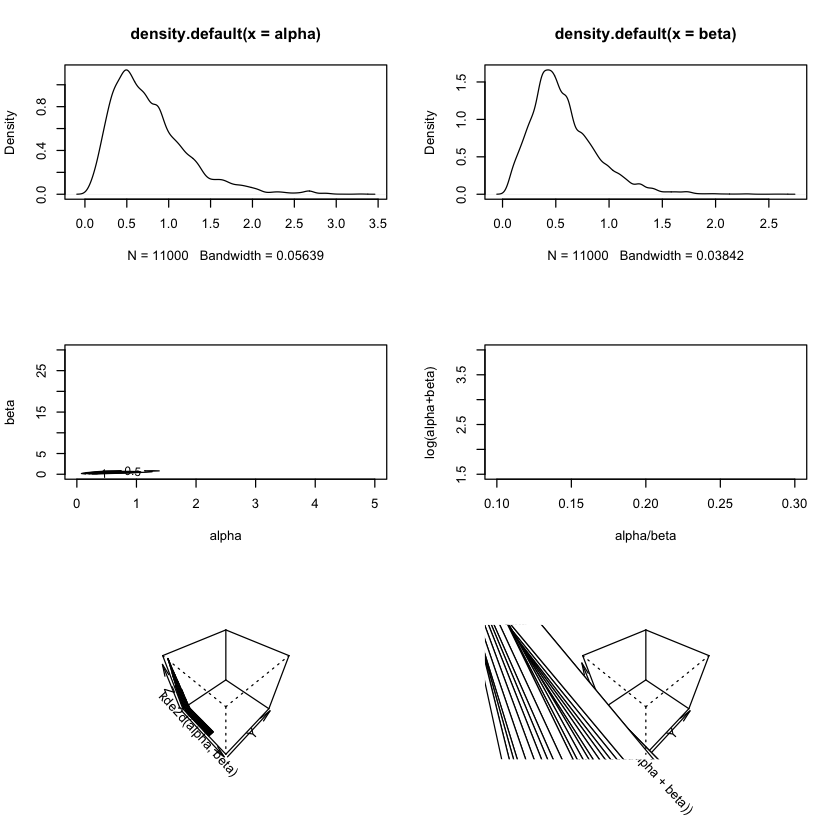

In [133]:
#######################################################################

library(MASS)

par(mfrow=c(3,2))

plot(density(alpha))
plot(density(beta))

contour(kde2d(alpha,beta),xlim=c(0,5),ylim=c(0,30),xlab="alpha",ylab="beta")
contour(kde2d(alpha/beta,log(alpha+beta)),xlim=c(0.1,0.3),ylim=c(1.5,4),
        xlab="alpha/beta",ylab="log(alpha+beta)")

persp(kde2d(alpha,beta),theta=45,phi=45,xlim=c(0,5),ylim=c(0,30))
persp(kde2d(alpha/beta,log(alpha+beta)),theta=45,phi=45,xlim=c(0.1,0.3),ylim=c(1.5,4))
        
########################################################################

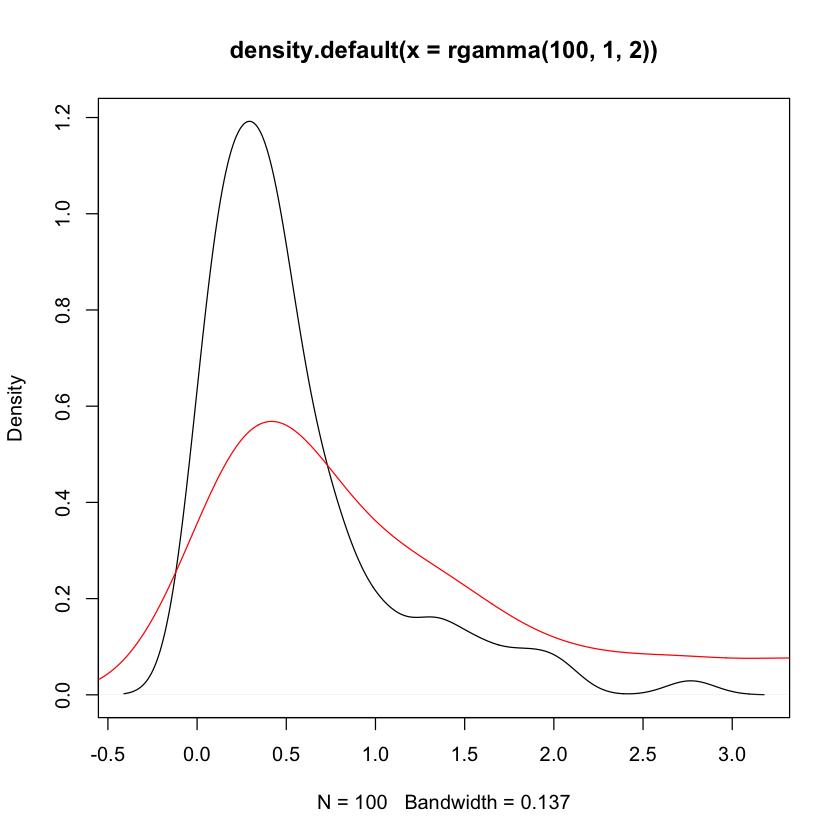

In [148]:
plot(density(rgamma(100,1,2)),type='l')
lines(density(rgamma(100,1,1)),col='red')

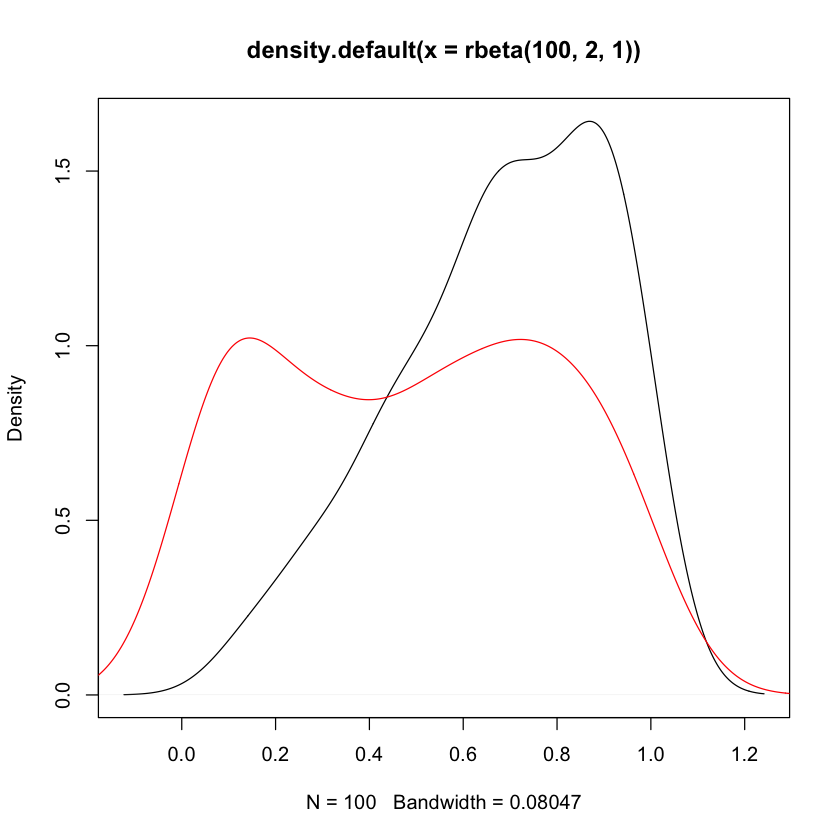

In [151]:
plot(density(rbeta(100,2,1)),type='l')
lines(density(rbeta(100,1,1)),col='red')